In [41]:
import tensorflow as tf
import numpy as np

celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

In [42]:
# Se usa el framework Keras para definir la red neuronal
# Capa densa: tiene conexiones desde cada neurona a todas las neuronas de la capa siguiente


################ MÉTODO CON UNA SOLA CAPA ################

# En este caso solo tiene una neurona
#capa = tf.keras.layers.Dense(units=1, input_shape=[1])
# Con input_shame se define la una entrada con una neurona

#modelo = tf.keras.Sequential([capa])  # Se crea el modelo con la capa definida

###########################################################




################ MÉTODO CON 3 CAPAS ################
# Añadimos lo que se llaman capas ocultas, donde volvemos a definir una capa densa con un numero de neuronas

oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

c:\Users\victo\miniconda3\envs\conda_env\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
modelo.compile(
    # Se define el optimizador, aquí se usa el algoritmo de Adam para
    optimizer=tf.keras.optimizers.Adam(0.1),
    # ir ajustando los pesos de la red. El numero de dentro es la tasa de aprendizaje
    loss='mean_squared_error'  # Se define la función de pérdida
)

In [44]:
print("Comenzando entrenamiento...")
historial = modelo.fit(celsius, fahrenheit, epochs=500, verbose=False)
# Epochs son las iteraciones, en este caso 1000 y verbose es para que no muestre el progreso
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


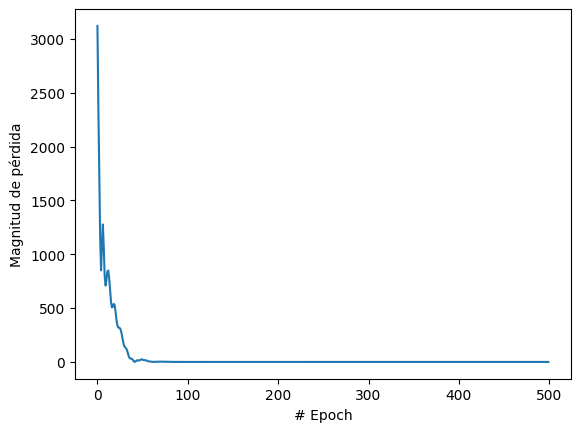

In [45]:
# Con esto vemos la función de pérdida y podemos ver en que numero de iteraciones 
# se estabiliza el error para no tener que hacer iteraciones de mas
import matplotlib.pyplot as plt
plt.xlabel("# Epoch")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

#  En el caso de la red con mas capas se puede ver que el error se estabiliza cerca de las 50 iteraciones

In [46]:
print("Hagamos una predicción!")
resultado = modelo.predict(np.array([100]))
print(f" El resultado es {resultado} fahrenheit!")

Hagamos una predicción!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
 El resultado es [[211.74742]] fahrenheit!


In [47]:
######### MODELO DE UNA SOLA CAPA #########
# A continuacion veremos el funcionamiento interno de la red
print("Variables internas del modelo")
#print(f" Capa: {capa.get_weights()} ")


# En este caso el peso está establecido en 1.8 y el sesgo en 28.9
# Es decir en este caso la red neuronal ha aprendido que la relación entre celsius y fahrenheit estableciendo 
# que la relación es de 1.8 y el sesgo es de 28.9. Esto no es del todo real por lo que deberiamos 
# de tener mas datos o de realizar mas iteraciones para que la red neuronal aprenda mejor

###########################################


######### MODELO DE 3 CAPAS #########
print(f" Primera capa oculta: {oculta1.get_weights()} ")
print(f" Segunda capa oculta: {oculta2.get_weights()} ")
print(f" Capa de salida: {salida.get_weights()} ")
#####################################

Variables internas del modelo
 Primera capa oculta: [array([[ 0.50373197,  0.3000499 , -0.23384869]], dtype=float32), array([ 3.8865564,  1.3934002, -3.6448307], dtype=float32)] 
 Segunda capa oculta: [array([[ 1.0315869 , -1.1655083 , -0.2210601 ],
       [-0.62019676, -0.347505  ,  0.32977295],
       [ 0.34083354,  0.9027852 ,  0.6233531 ]], dtype=float32), array([ 1.4851786, -3.803974 , -3.696684 ], dtype=float32)] 
 Capa de salida: [array([[ 0.26292953],
       [-1.7436514 ],
       [-0.9962284 ]], dtype=float32), array([3.604367], dtype=float32)] 
